Notebook to compare Race Rocks lighthouse daily salinity readings with nowcasts.
* http://www.pac.dfo-mpo.gc.ca/science/oceans/data-donnees/lighthouses-phares/index-eng.html


Lighthouse salinty readings are collected at the daytime high tide. I will compare with both nowcast and spinup daily averages.

Temperature is also available, but it is complicated by the time shift in the high tide and the diurnal vairability in temperature. I will not look at temperature for now, but could come up with a fair comparison later.

In [1]:
import pandas as pd
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import datetime
import lighthouses as lh
from dateutil import tz

import seaborn as sns

from salishsea_tools.nowcast import analyze
from salishsea_tools import tidetools, viz_tools

%matplotlib inline

In [2]:
sns.set_style('darkgrid')

# Load model grid

In [3]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

#Define dates to examine

In [9]:
to_nowcast = datetime.datetime(2014,10,27)
tf_nowcast = datetime.datetime(2015,6,30)
to_spin = datetime.datetime(2003,1,1)
tf_spin = datetime.datetime(2003,12,31)

# Race Rocks

In [15]:
reload(lh)

<module 'lighthouses' from 'lighthouses.py'>

(5928,) (5928,)


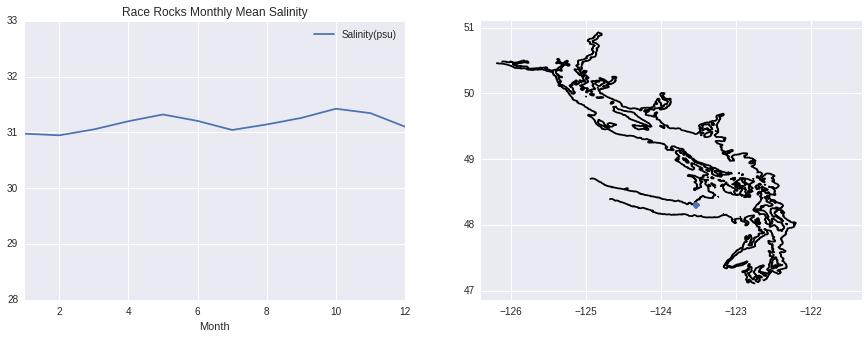

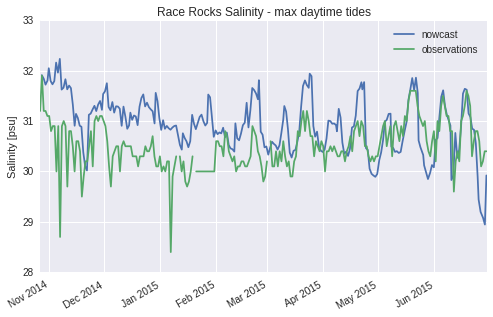

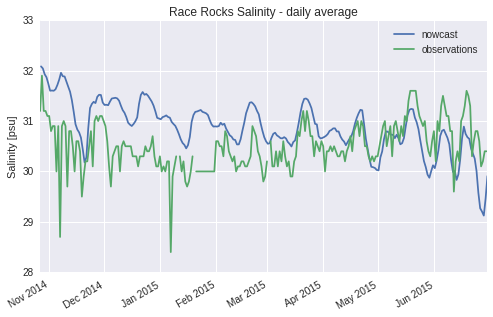

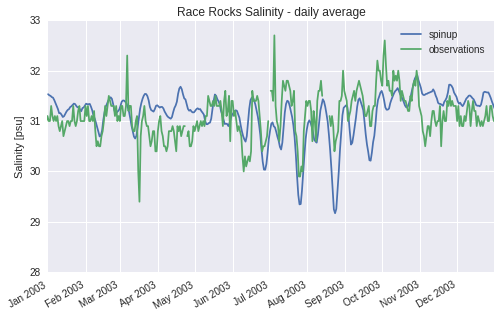

In [16]:
lighthouse = 'Race Rocks'
fig = lh.monthly_means(lighthouse,grid_B)
fig = lh.compare_model(to_nowcast,tf_nowcast,lighthouse,'nowcast','1h',grid_B)
fig = lh.compare_model(to_nowcast,tf_nowcast,lighthouse,'nowcast','1d',grid_B)
fig = lh.compare_model(to_spin,tf_spin,lighthouse,'spinup','1d',grid_B)

* Timing of the peaks is pretty good.
* nowcast is too fresh in the summer, too salty in the winter
* spinup is ok, but fresh peaks in summer are too fresh.
* Why is winter nowcast much saliter than obs, but winter spin up is ok?

#Entrance Island

(5928,) (5928,)


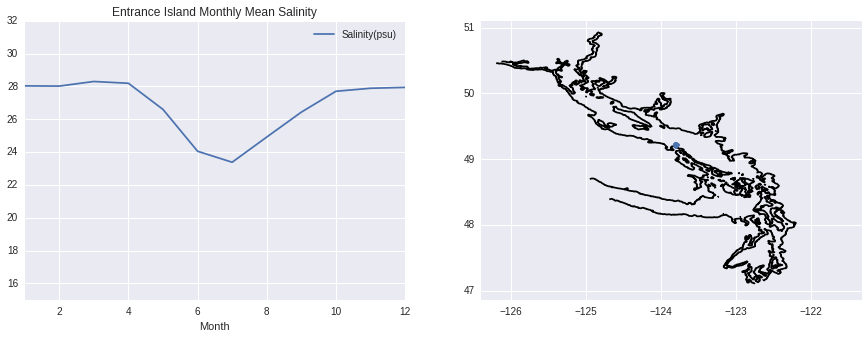

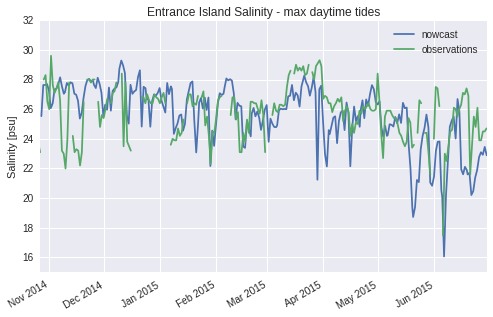

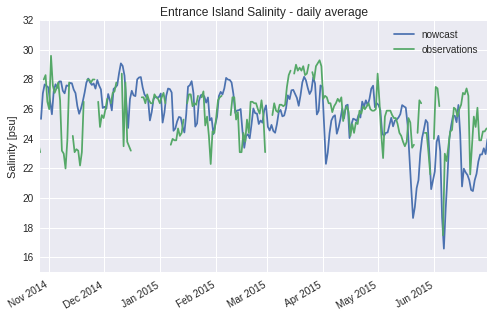

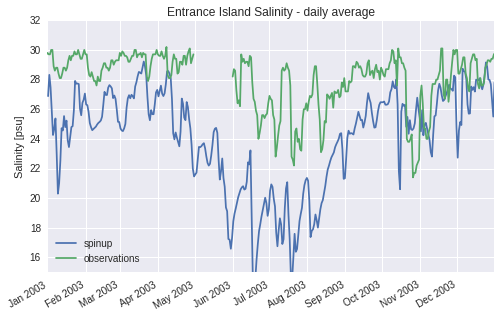

In [18]:
smin=15; smax=32
lighthouse = 'Entrance Island'
fig = lh.monthly_means(lighthouse,grid_B,smin=smin,smax=smax)
fig = lh.compare_model(to_nowcast,tf_nowcast,lighthouse,'nowcast','1h',grid_B,smin=smin,smax=smax)
fig = lh.compare_model(to_nowcast,tf_nowcast,lighthouse,'nowcast','1d',grid_B,smin=smin,smax=smax)
fig = lh.compare_model(to_spin,tf_spin,lighthouse,'spinup','1d',grid_B,smin=smin,smax=smax)

Spin up year much too fresh. Nowcast looks reasonable

#Chrome Island


(5928,) (5928,)


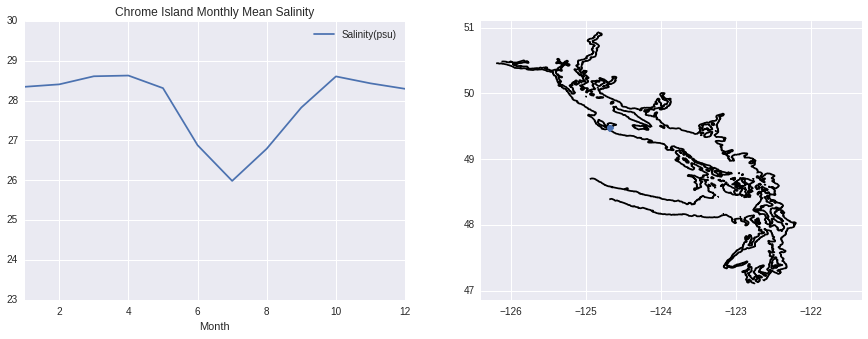

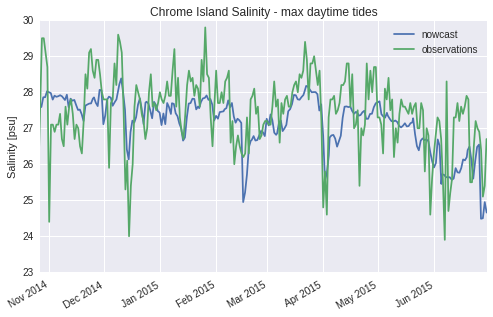

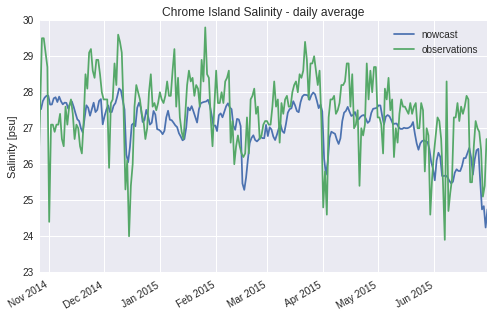

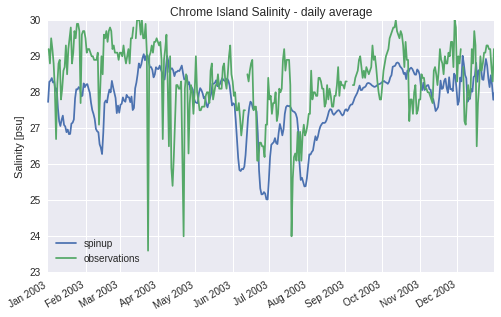

In [20]:
smin=23; smax=30
lighthouse = 'Chrome Island'
fig = lh.monthly_means(lighthouse,grid_B,smin=smin,smax=smax)
fig = lh.compare_model(to_nowcast,tf_nowcast,lighthouse,'nowcast','1h',grid_B,smin=smin,smax=smax)
fig = lh.compare_model(to_nowcast,tf_nowcast,lighthouse,'nowcast','1d',grid_B,smin=smin,smax=smax)
fig = lh.compare_model(to_spin,tf_spin,lighthouse,'spinup','1d',grid_B,smin=smin,smax=smax)

* nowcast is looking slightly too fresh in the north at almost all times.
* spinup is also too fresh

# Trends
* During winter Race Rocks is too salty in the nowcast, but ok in the spin up. 
* North might be a little too fresh, but I only have one data point. 
* Fresh water pulses at Race Rocks are too fresh,
* SoG spinup year is fresher than observed. Was 2003 a low flow year? When I look at Fraser River at Hope discharge, 2003 is a typical. It aligns closely with the mean.
